In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('../Data/HouseImformation.csv')

In [3]:
df['Area'] = df['Area'].str.replace(',', '').astype(float)

df=df.dropna()

isoOuter=IsolationForest(contamination=0.01)
df['OuterData']=isoOuter.fit_predict(df[["Area", "Price"]])

df=df.drop(index=df[df['OuterData'] == -1].index)

MeanPriceAddressOuter=df.groupby("Address")["Price"].mean()
df["MeanPriceA"] = df["Address"].map(MeanPriceAddressOuter)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_Data = scaler.fit_transform(df[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_Data=df['Price'].values


In [5]:
mask= np.random.rand(len(df)) < 0.8

train=df[mask]
test=df[~mask]

x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train['Price'])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test['Price'])

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold ,cross_val_score

model=RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42)

cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

crossVal=cross_val_score(model,x_Data,y_Data,cv=cv)

print("Mean Is: ",crossVal.mean())
print("Standard deviation: ", np.std(crossVal))


Mean Is:  0.8639920760246451
Standard deviation:  0.03164036880349259


In [7]:
model.fit(x_train,y_train)

y_predict=model.predict(x_test)

from sklearn.metrics import r2_score
print(f"Test R2 Score: {r2_score(y_test, y_predict):.2f}")

Test R2 Score: 0.87


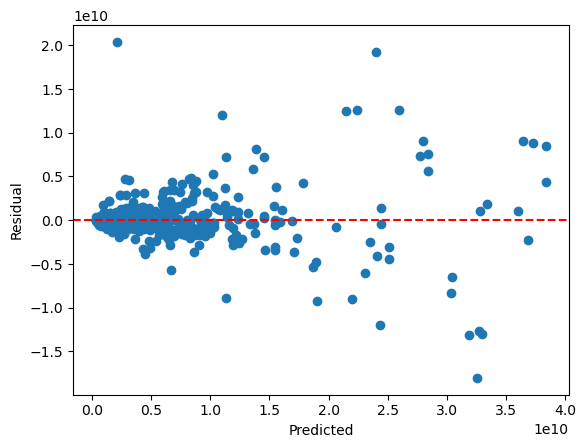

MAE: 1108638468.7563522


In [8]:
residuals = y_test - y_predict
plt.scatter(y_predict, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()


from sklearn.metrics import mean_absolute_error
print("MAE:", mean_absolute_error(y_test, y_predict))

In [10]:
pip=Pipeline([
    ('scale',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
    ('RandomForestRegressor',RandomForestRegressor())
])

cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

crossVal=cross_val_score(pip,x_Data,y_Data,cv=cv)

print("Mean Is: ",crossVal.mean())
print("Standard deviation: ", np.std(crossVal))


Mean Is:  0.8514410661252066
Standard deviation:  0.03522051412915852


In [11]:
pip.fit(x_train,y_train)

y_predictR=pip.predict(x_test)

from sklearn.metrics import r2_score
print(f"Test R2 Score: {r2_score(y_test, y_predictR):.2f}")

Test R2 Score: 0.84


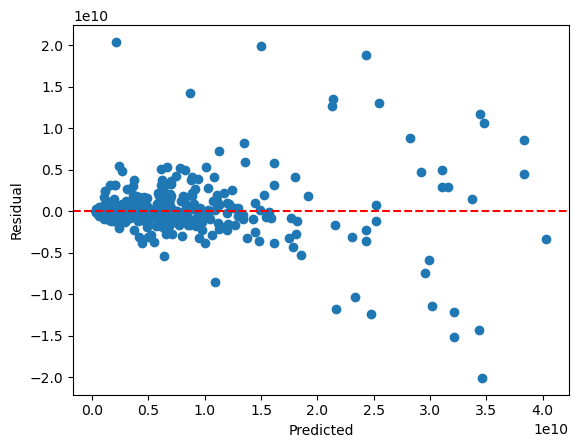

MAE: 1168107444.8711512


In [12]:
residuals = y_test - y_predictR
plt.scatter(y_predictR, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()


from sklearn.metrics import mean_absolute_error
print("MAE:", mean_absolute_error(y_test, y_predictR))